In [1]:
import numpy as np # TO EFFICIENTLY HANDLE ARRAYS
import pandas as pd # TO WORK WITH DTASET AS DATAFRAME
import seaborn as sns # PLOTTING GRAPHS
import matplotlib.pyplot as plt # PLOTTING GRAPHS
import matplotlib.ticker as ticker
# from forex_python.converter import CurrencyRates # CURRENCY INTER-CONVERSION
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn import metrics
# import xgboost as xgb

In [2]:
df = pd.read_csv(r'1806507.csv')
#Reading the data from the dataset.

In [3]:
df.head()
#Shows the first five column of the dataset.

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200749782,KROG systems,2019-11-08 00:00:00,2019.0,1.930042e+09,2019-10-24,20191022,20191024,20191108.0,USD,RV,1.0,NaN,43874.34,20191024.0,NAA8,1.930042e+09,0
1,U001,CCU013,KRAFT F corporation,2020-02-28 00:00:00,2020.0,1.930357e+09,2020-01-08,20200106,20200108,20200108.0,USD,RV,1.0,NaN,14916.00,20200108.0,NAX2,1.930357e+09,0
2,U001,200458131,TIMES trust,2019-04-17 00:00:00,2019.0,1.929033e+09,2019-04-02,20190401,20190402,20190417.0,USD,RV,1.0,NaN,4178.20,20190402.0,NAA8,1.929033e+09,0
3,U001,0200803720,DEC foundation,2019-07-01 00:00:00,2019.0,1.929538e+09,2019-06-25,20190625,20190625,20190709.0,USD,RV,1.0,NaN,4975.54,20190616.0,NAM4,1.929538e+09,0
4,U001,0200743996,STATER llc,2019-11-01 00:00:00,2019.0,1.930021e+09,2019-10-17,20191016,20191017,20191101.0,USD,RV,1.0,NaN,61785.22,20191017.0,NAA8,1.930021e+09,0


In [4]:
df.tail()
# Shows the last five column of the dataset.

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200762301,C&S WH llc,NaN,2020.0,1.930728e+09,2020-04-02,20200401,20200402,20200417.0,USD,RV,1.0,NaN,18200.81,20200402.0,NAC6,1.930728e+09,1
49996,U001,0200743123,KROGER trust,NaN,2020.0,1.930634e+09,2020-03-11,20200310,20200311,20200326.0,USD,RV,1.0,NaN,19436.31,20200311.0,NAA8,1.930634e+09,1
49997,CA02,0140106408,WAL-M llc,NaN,2020.0,2.960626e+09,2020-04-02,20200402,20200402,20200412.0,CAD,RV,1.0,NaN,2874.24,20200402.0,CA10,2.960626e+09,1
49998,U001,0200508557,FOODL systems,NaN,2020.0,1.930834e+09,2020-05-05,20200504,20200505,20200520.0,USD,RV,1.0,NaN,2208.33,20200505.0,NAA8,1.930834e+09,1
49999,CA02,0140104223,H Y LO trust,NaN,2020.0,2.960626e+09,2020-04-05,20200405,20200405,20200424.0,CAD,RV,1.0,NaN,34165.35,20200414.0,CA10,2.960626e+09,1


In [5]:
df.shape
# Identifies the number of rows and columns.

(50000, 19)

In [6]:

df.info()
# shows the information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45001 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [7]:
df.nunique()
# nunique() function we can see the number of unique entries in each column. 


business_code                 6
cust_number                1473
name_customer              4286
clear_date                  401
buisness_year                 2
doc_id                    50000
posting_date                503
document_create_date        507
document_create_date.1      503
due_in_date                 545
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         45346
baseline_create_date        504
cust_payment_terms           74
invoice_id                49996
isOpen                        2
dtype: int64

# Converting dates to datetime datatype--

In [8]:
# From above we observed that the date columns have differnt datatypes so now converting them to datetime datatype.
df['clear_date']= pd.to_datetime(df['clear_date'])
df['posting_date']= pd.to_datetime(df['posting_date'])
df['document_create_date']= pd.to_datetime(df['document_create_date'],format='%Y%m%d')
df['document_create_date.1']= pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['due_in_date']= pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date']= pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')

In [9]:
# buisness_year is not of type but is of type float. Years cannot be fractions.
df["buisness_year"]=pd.to_datetime(df["buisness_year"],format='%Y').dt.year

In [10]:
# We can observe that the datatypes have been changed accordingly.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              45001 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  int64         
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

# Finding & Removing Anomalies 
## Sanity Check

In [11]:
print("Here we are Checking if the due_in_date is of before baseline_create_date") # as baseline_create_date is the date in which the invoice is created and due_in_date is the date in which the customer is expected to clear an invoice. So, the dur_in_date shouldnt be before the baseline_create_date.
print("Found: ",df[df["baseline_create_date"]>df.due_in_date]["due_in_date"].count()) 

print("Checking if clear_date is of before document_created_date.1") # as clear_date means the invoice is clear that day and document_create_date means the invoice is created that day document_create_date can never have the date after the clear_date.
print("Found: ",df[df["document_create_date.1"]>df.clear_date]["clear_date"].count())

print("Checking if total_open_amount<0") # total_open_amount means the amount left to be paid which cannot be <0.
print("Found: ",df[df.total_open_amount<0 ]["total_open_amount"].count())

Here we are Checking if the due_in_date is of before baseline_create_date
Found:  0
Checking if clear_date is of before document_created_date.1
Found:  0
Checking if total_open_amount<0
Found:  0


###  Creating a seperate dataframe for rows having null clear data or open invoices. We shall use it later for predicting the payment

In [12]:
open_invoice_df = df[df["clear_date"].isna()] # checks for null entry in the clear_date
df = df[df["clear_date"].notna()] # checks for the not null entry.
df.reset_index(inplace=True) # resets the index after dropping the null entries.

In [13]:
# It shows the top 5 rows
open_invoice_df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45001,U001,0200792293,UNIFIE corporation,NaT,2020,1.930675e+09,2020-03-20,2020-03-20,2020-03-20,2020-04-04,USD,RV,1.0,NaN,16662.44,2020-03-20,NAA8,1.930675e+09,1
45002,U001,0200772595,SAFEW co,NaT,2020,1.930693e+09,2020-03-24,2020-03-24,2020-03-24,2020-04-08,USD,RV,1.0,NaN,20719.26,2020-03-24,NAA8,1.930693e+09,1
45003,U001,0200772670,ASSOCIAT in,NaT,2020,1.930611e+09,2020-03-06,2020-03-06,2020-03-06,2020-03-21,USD,RV,1.0,NaN,107810.47,2020-03-06,NAU5,1.930611e+09,1
45004,CA02,0140106408,WAL-M,NaT,2020,2.960627e+09,2020-04-06,2020-04-07,2020-04-06,2020-04-04,CAD,RV,1.0,NaN,2455.22,2020-03-25,CA10,2.960627e+09,1
45005,U001,0200799367,MCL corp,NaT,2020,1.930595e+09,2020-03-03,2020-03-03,2020-03-03,2020-03-18,USD,RV,1.0,NaN,48278.44,2020-03-03,NAA8,1.930595e+09,1


## Creating the Target column

In [14]:
df["delay"] = (df["clear_date"] - df["due_in_date"]).dt.days

In [15]:
# We are sorting the dataframe acording to the baseline_create_date.
df = df.sort_values(by="baseline_create_date",ignore_index=True)

In [16]:
# checking for the information. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45001 entries, 0 to 45000
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   45001 non-null  int64         
 1   business_code           45001 non-null  object        
 2   cust_number             45001 non-null  object        
 3   name_customer           45001 non-null  object        
 4   clear_date              45001 non-null  datetime64[ns]
 5   buisness_year           45001 non-null  int64         
 6   doc_id                  45001 non-null  float64       
 7   posting_date            45001 non-null  datetime64[ns]
 8   document_create_date    45001 non-null  datetime64[ns]
 9   document_create_date.1  45001 non-null  datetime64[ns]
 10  due_in_date             45001 non-null  datetime64[ns]
 11  invoice_currency        45001 non-null  object        
 12  document type           45001 non-null  object

In [17]:
# there are 45001 rows. We shall make the train set to be 70% of this
df.iloc[31500]

index                                     430
business_code                            CA02
cust_number                        0140104429
name_customer                       COSTCO co
clear_date                2019-10-23 00:00:00
buisness_year                            2019
doc_id                           2960583170.0
posting_date              2019-09-30 00:00:00
document_create_date      2019-09-30 00:00:00
document_create_date.1    2019-09-30 00:00:00
due_in_date               2019-10-18 00:00:00
invoice_currency                          CAD
document type                              RV
posting_id                                1.0
area_business                             NaN
total_open_amount                    14759.29
baseline_create_date      2019-10-08 00:00:00
cust_payment_terms                       CA10
invoice_id                       2960583170.0
isOpen                                      0
delay                                       5
Name: 31500, dtype: object

# Splitting the data on the basis of date

In [18]:
train=df[df['baseline_create_date'] < '2019-10-01'].copy()
test=df[df['baseline_create_date'] >= '2019-10-01'].reset_index(drop=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14332 entries, 0 to 14331
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   14332 non-null  int64         
 1   business_code           14332 non-null  object        
 2   cust_number             14332 non-null  object        
 3   name_customer           14332 non-null  object        
 4   clear_date              14332 non-null  datetime64[ns]
 5   buisness_year           14332 non-null  int64         
 6   doc_id                  14332 non-null  float64       
 7   posting_date            14332 non-null  datetime64[ns]
 8   document_create_date    14332 non-null  datetime64[ns]
 9   document_create_date.1  14332 non-null  datetime64[ns]
 10  due_in_date             14332 non-null  datetime64[ns]
 11  invoice_currency        14332 non-null  object        
 12  document type           14332 non-null  object

In [19]:
print(train.shape) 
# It shows the number of rows and columns in the train part.

(30669, 21)


In [20]:
print(test.shape)
 # It shows the number of rows and columns in the test part.

(14332, 21)


In [21]:
train.info() 
# Information regarding the train set.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30669 entries, 0 to 30668
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   30669 non-null  int64         
 1   business_code           30669 non-null  object        
 2   cust_number             30669 non-null  object        
 3   name_customer           30669 non-null  object        
 4   clear_date              30669 non-null  datetime64[ns]
 5   buisness_year           30669 non-null  int64         
 6   doc_id                  30669 non-null  float64       
 7   posting_date            30669 non-null  datetime64[ns]
 8   document_create_date    30669 non-null  datetime64[ns]
 9   document_create_date.1  30669 non-null  datetime64[ns]
 10  due_in_date             30669 non-null  datetime64[ns]
 11  invoice_currency        30669 non-null  object        
 12  document type           30669 non-null  object

# EDA

## Removing Constant and Quasi constant data

In [22]:
train.nunique() 
# identifies the number of unique entries in each column in the train set.

index                     30669
business_code                 6
cust_number                1299
name_customer              3517
clear_date                  283
buisness_year                 1
doc_id                    30669
posting_date                275
document_create_date        280
document_create_date.1      275
due_in_date                 337
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         28139
baseline_create_date        275
cust_payment_terms           63
invoice_id                30665
isOpen                        1
delay                       184
dtype: int64

In [23]:
train.duplicated().sum() 
# Find the duplicates in the trainset.
# It was concluded that there was no duplicates found.

0

In [24]:
train.nunique()
#identifies the number of unique entries in each column in the train set.

index                     30669
business_code                 6
cust_number                1299
name_customer              3517
clear_date                  283
buisness_year                 1
doc_id                    30669
posting_date                275
document_create_date        280
document_create_date.1      275
due_in_date                 337
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         28139
baseline_create_date        275
cust_payment_terms           63
invoice_id                30665
isOpen                        1
delay                       184
dtype: int64

In [25]:
train.describe() 
# Describes the trainset.

,index,buisness_year,doc_id,posting_id,area_business,total_open_amount,invoice_id,isOpen,delay
count,30669.000000,30669.0,3.066900e+04,30669.0,0.0,30669.000000,3.066500e+04,30669.0,30669.000000
mean,22486.884704,2019.0,2.011491e+09,1.0,NaN,32134.341698,2.010514e+09,0.0,1.132609
std,12992.103347,0.0,2.888303e+08,0.0,NaN,40661.266207,2.758945e+08,0.0,11.850900
min,2.000000,2019.0,1.928502e+09,1.0,NaN,3.420000,1.928502e+09,0.0,-89.000000
25%,11233.000000,2019.0,1.928991e+09,1.0,NaN,4578.210000,1.928991e+09,0.0,-3.000000
50%,22523.000000,2019.0,1.929406e+09,1.0,NaN,17159.050000,1.929406e+09,0.0,0.000000
75%,33717.000000,2019.0,1.929748e+09,1.0,NaN,46301.480000,1.929747e+09,0.0,2.000000
max,45000.000000,2019.0,9.500000e+09,1.0,NaN,860880.000000,2.960583e+09,0.0,277.000000


In [26]:
train.drop(["buisness_year","isOpen","posting_id","area_business"],axis=1,inplace=True) 
# dropping this constant and quasi constant columns.

# Checking correlation between numerical columns

['index', 'doc_id', 'total_open_amount', 'invoice_id', 'delay']


<AxesSubplot:>

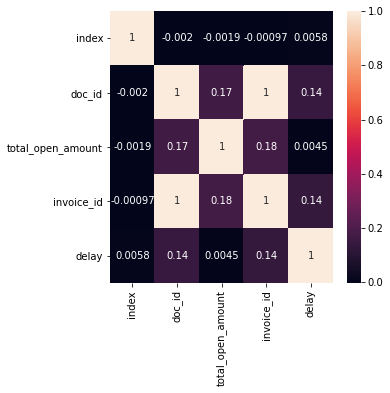

In [27]:
numerical_columns=train.select_dtypes(include=np.number).columns.tolist()
print(numerical_columns)
correlation=train.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(correlation,annot=True)
## From here we can observe that doc_id and invoice_id are too highly correlated columns and can be deleted.

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

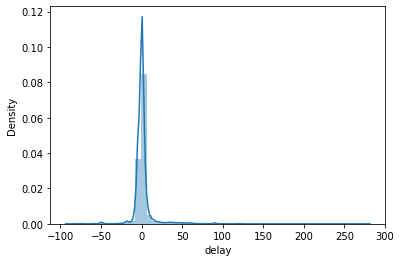

In [28]:
sns.distplot(train['delay']) 
# Plotting the delay .

In [29]:
train.corr().loc['delay',:] 
#checking the correlation of delay with other columns.

index                0.005842
doc_id               0.143162
total_open_amount    0.004467
invoice_id           0.135599
delay                1.000000
Name: delay, dtype: float64

In [30]:
train.drop(["doc_id","invoice_id"],axis=1,inplace=True)
 # As mentioned above dropping this columns.

In [31]:
train.info() 
# info of the trainset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30669 entries, 0 to 30668
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   30669 non-null  int64         
 1   business_code           30669 non-null  object        
 2   cust_number             30669 non-null  object        
 3   name_customer           30669 non-null  object        
 4   clear_date              30669 non-null  datetime64[ns]
 5   posting_date            30669 non-null  datetime64[ns]
 6   document_create_date    30669 non-null  datetime64[ns]
 7   document_create_date.1  30669 non-null  datetime64[ns]
 8   due_in_date             30669 non-null  datetime64[ns]
 9   invoice_currency        30669 non-null  object        
 10  document type           30669 non-null  object        
 11  total_open_amount       30669 non-null  float64       
 12  baseline_create_date    30669 non-null  dateti

Text(0.5, 1.0, 'Count')

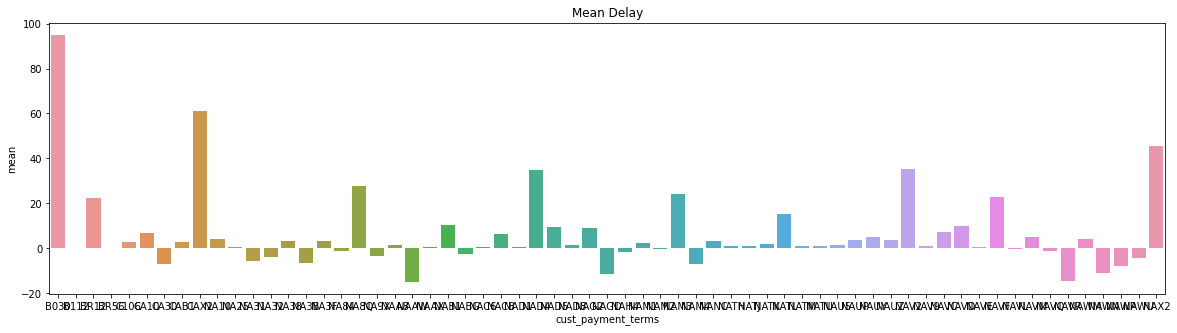

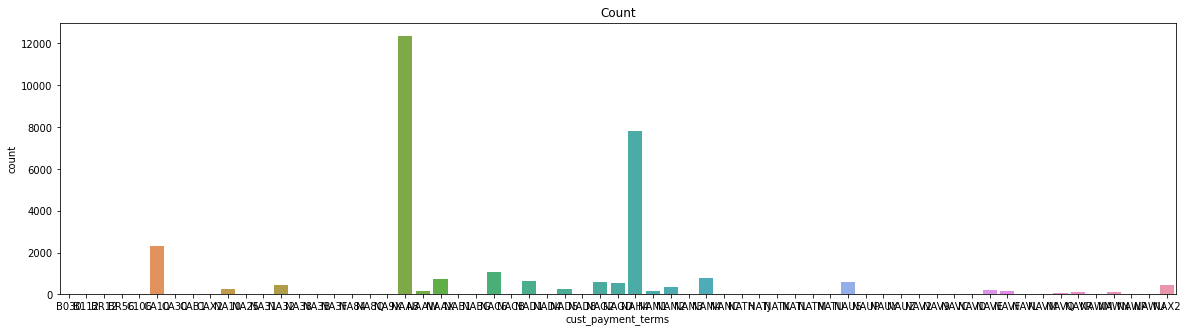

In [32]:
payment_terms = train.groupby("cust_payment_terms")["delay"].agg(["mean","count"]).reset_index(drop=False)
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='cust_payment_terms',y='mean',data=payment_terms).set_title("Mean Delay")
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='cust_payment_terms',y='count',data=payment_terms).set_title("Count")
# It was observed that the mean delay varies with the cust_payment_score and is not dependent on the frequency.

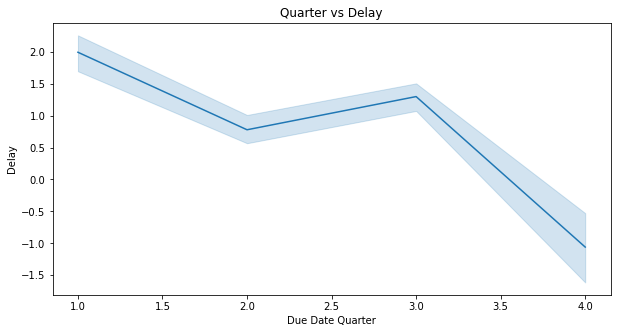

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(x=train["due_in_date"].dt.quarter, y=train.delay)
plt.xlabel("Due Date Quarter")
plt.ylabel("Delay")
plt.title("Quarter vs Delay")
plt.show()
#Checking Relation between Delay and Quarter
#It is observed that the delay is high in the first two quarters and payments are early in the last quarter

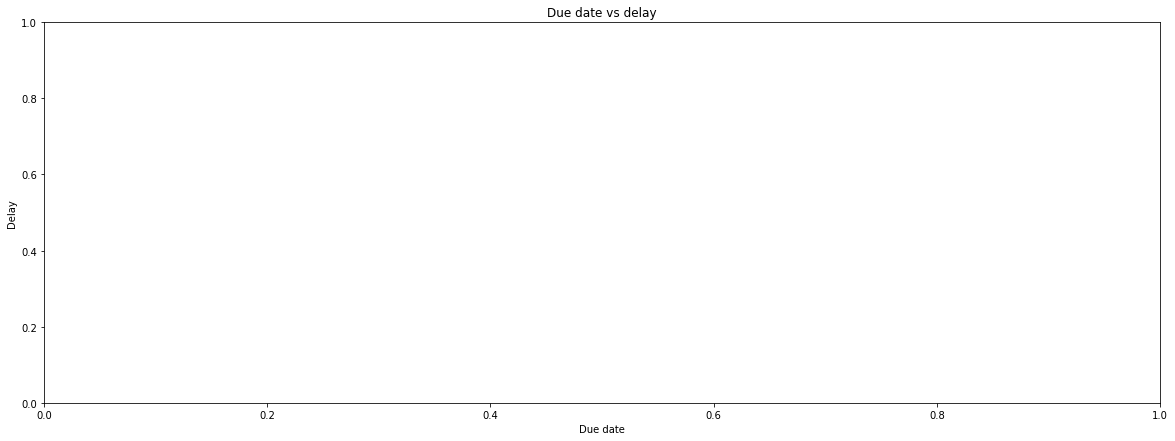

In [34]:
plt.figure(figsize=(20,7))
plt.scatter(np.array(train["due_in_date"].dt.isocalendar().week), train.delay,color='g')
plt.xlabel("Due date")
plt.ylabel("Delay")
plt.title("Due date vs delay")
plt.show()

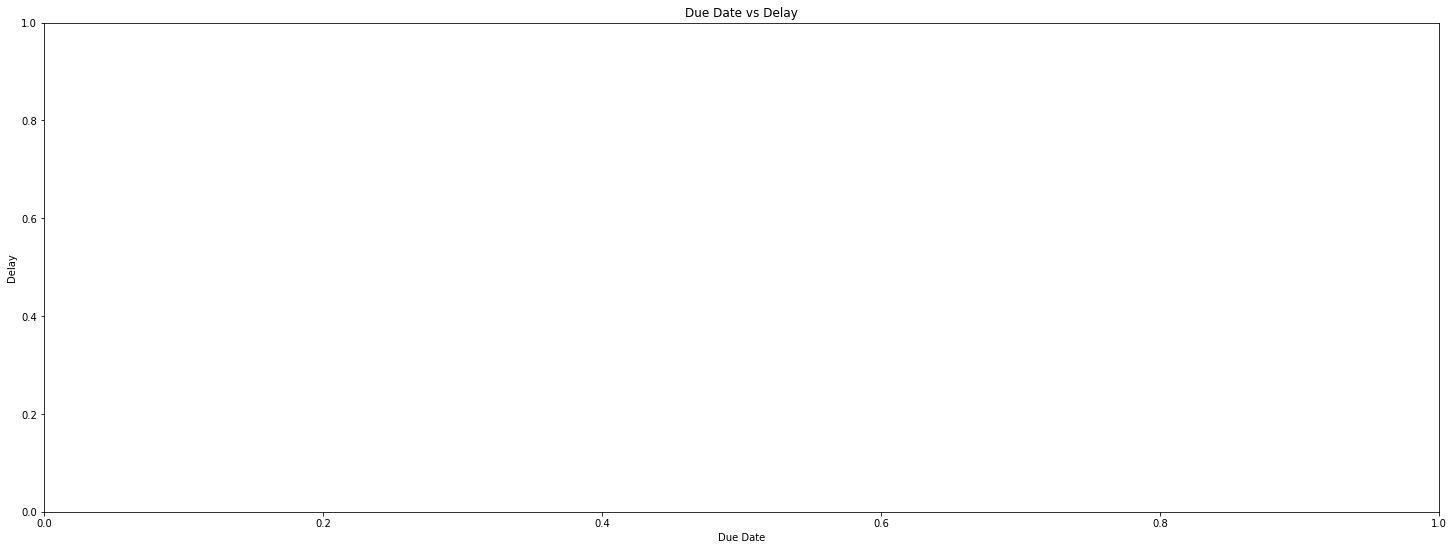

In [35]:
plt.figure(figsize=(25,9))
ax=sns.lineplot(x=np.array(train["due_in_date"].dt.isocalendar().week), y=train.delay,size_order=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlabel("Due Date")
plt.ylabel("Delay")
plt.title("Due Date vs Delay")
plt.show()
#Checking relation between delay and week of year
#It was noticed that the delays are high in the first 3 weeks of the year and the last 2 weeks of the year

In [36]:
cat_columns=list(train.columns[train.dtypes=='object'])
train[cat_columns].nunique()
# Now Analysing the catagorical columns

business_code            6
cust_number           1299
name_customer         3517
invoice_currency         2
document type            2
cust_payment_terms      63
dtype: int64

In [37]:
print(train.business_code.unique())
#checking all unique business code , only 6 types are there.

print(train.invoice_currency.unique())
#checking invoice currency available ,  it is observed only 2 types are there.It can be cateogarised into binary column: "isUSD"

print(train['document type'].unique())
# checking the document type , only 2 types ate there.

['U001' 'CA02' 'U013' 'U002' 'U005' 'U007']
['USD' 'CAD']
['RV' 'X2']


In [38]:
print(train.invoice_currency.value_counts())
# it counts the number of invoice_currency in USD and CAD.
print(train['document type'].value_counts()) 
# it counts the number of documents in RV and X2 type.

USD    28282
CAD     2387
Name: invoice_currency, dtype: int64
RV    30665
X2        4
Name: document type, dtype: int64


Text(0.5, 1.0, 'Invoice Currency vs Count')

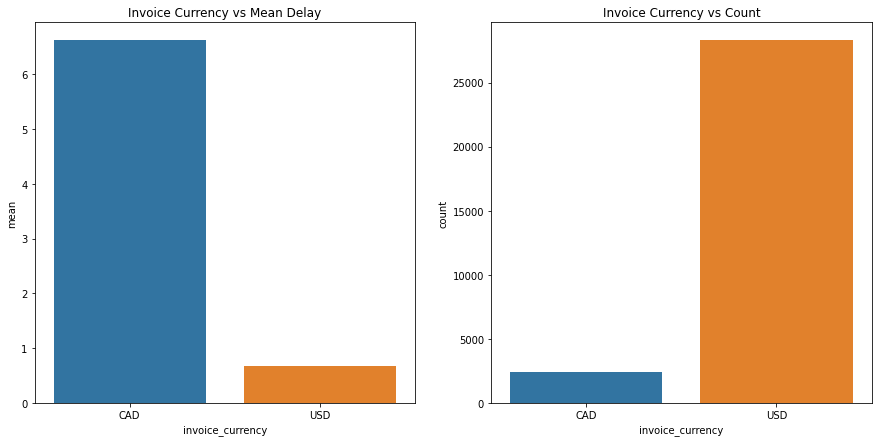

In [39]:
currency_group = train.groupby("invoice_currency")["delay"].agg(["mean","count"]).reset_index(drop=False)
fig, ax = plt.subplots(1,2,figsize=(15,7),sharex="col")
sns.barplot(ax=ax[0],x='invoice_currency',y='mean',data=currency_group)
ax[0].set_title("Invoice Currency vs Mean Delay")
# barplot for mean of both the currency types.

sns.barplot(x='invoice_currency',y='count',data=currency_group)
ax[1].set_title("Invoice Currency vs Count")

# barplot for count of both the currency types.

<AxesSubplot:>

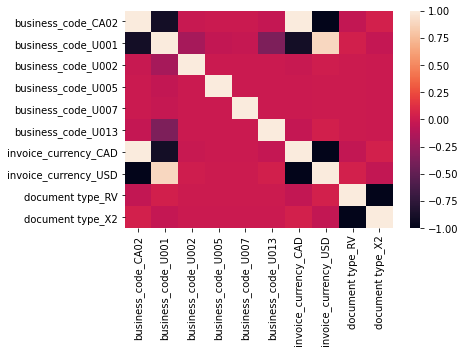

In [40]:
cat_corr = pd.get_dummies(train[["business_code","invoice_currency","document type"]]).corr()
sns.heatmap(cat_corr)  # heatmap showing correlation.

In [41]:
value = set(train["cust_payment_terms"])
key = list(range(1,len(value)+1))
mapping = {}
for k,v in zip(key,value):
    mapping[k] = v

##Function to map the label
def payment_label_encoder(label):
    return mapping.get(label,500)

train["cust_payment_terms"] =train["cust_payment_terms"].apply(payment_label_encoder)
test["cust_payment_terms"] = test["cust_payment_terms"].apply(payment_label_encoder)

In [42]:
businessOrdinalEncoder = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=15)
train["business_code"] = businessOrdinalEncoder.fit_transform(train[["business_code"]])
test["business_code"] = businessOrdinalEncoder.transform(test[["business_code"]])

In [43]:
train["due_week"] = train["due_in_date"].dt.isocalendar().week
test["due_week"] = test["due_in_date"].dt.isocalendar().week

In [44]:
currencyLabelEncoder = LabelEncoder() 
train["invoice_currency"] = currencyLabelEncoder.fit_transform(train["invoice_currency"])
test["invoice_currency"] = currencyLabelEncoder.transform(test["invoice_currency"])

In [45]:
train["baseline_month"] = train["baseline_create_date"].dt.month
test["baseline_month"] = test["baseline_create_date"].dt.month

In [46]:
train["baseline_day"] = train["baseline_create_date"].dt.day
test["baseline_day"] = test["baseline_create_date"].dt.day

In [47]:
train["due_baseline"] = (train["due_in_date"] - train["baseline_create_date"]).dt.days
test["due_baseline"] = (test["due_in_date"] - test["baseline_create_date"]).dt.days

In [48]:
cust_mean_delay=train.groupby("cust_number")['delay'].mean().to_dict()
train['mean_delay']=train['cust_number'].map(cust_mean_delay)
test['mean_delay']=test['cust_number'].map(cust_mean_delay)
test["mean_delay"] = test["mean_delay"].fillna(test["mean_delay"].mean())

In [49]:
x_train = train.loc[:,["invoice_currency","total_open_amount","cust_payment_terms","baseline_month","baseline_day","due_baseline","mean_delay"]]
y_train = train.loc[:,["delay"]]

In [50]:
X = test.loc[:,["invoice_currency","total_open_amount","cust_payment_terms","baseline_month","baseline_day","due_baseline","mean_delay"]]
y = test.loc[:,["delay"]]
X_validation, X_test, y_validation, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
#Thus keeping Train,Val and Test as 70%/15%/15%

# Training and Tuning using Random Forest

In [51]:
rfr = RandomForestRegressor(n_jobs=-1,n_estimators=200,max_depth=10)

In [52]:
rfr.fit(x_train,y_train)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1)

In [53]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7166 entries, 7166 to 14331
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   invoice_currency    7166 non-null   int32  
 1   total_open_amount   7166 non-null   float64
 2   cust_payment_terms  7166 non-null   int64  
 3   baseline_month      7166 non-null   int64  
 4   baseline_day        7166 non-null   int64  
 5   due_baseline        7166 non-null   int64  
 6   mean_delay          7166 non-null   float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 419.9 KB


In [54]:
rfr.score(X_validation,y_validation)

0.42525845166105025

In [55]:
y_pred = rfr.predict(X_validation)

In [56]:
print("Val Score",r2_score(y_validation, y_pred))
print("Train Score",r2_score(y_train, rfr.predict(x_train)))

Val Score 0.42525845166105025
Train Score 0.7406630610611264


In [57]:
reg_cv = RandomizedSearchCV(rfr, { 'max_depth': [8,10,15], 'n_estimators': [200,500,1000], }, verbose=1)
reg_cv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kiit\appdata\local\programs\python\python37\lib\site-

KeyboardInterrupt: 

In [ ]:
reg_cv.best_params_

In [58]:
regressor = RandomForestRegressor(**{'max_depth': 8, 'n_estimators': 500},n_jobs=-1)
regressor.fit(x_train,y_train)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=8, n_estimators=500, n_jobs=-1)

In [59]:
regressor.score(X_test,y_test)

0.5196742375246991

In [60]:
predictions = regressor.predict(X_test)

# Conclusion

In [61]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.104263741236089
MSE: 45.693035679584156
RMSE: 6.75966239390579


In [62]:
train


,index,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_week,baseline_month,baseline_day,due_baseline,mean_delay
0,33943,1.0,0200769623,WAL-MAR us,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,RV,15802.32,2018-12-30,500,-5,3,12,30,15,-2.226421
1,13647,1.0,0200726979,BJ'S,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,RV,553.42,2018-12-30,500,1,3,12,30,15,0.902579
2,32522,1.0,0200769623,WAL-MAR co,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,RV,1445.64,2018-12-30,500,-5,3,12,30,15,-2.226421
3,9300,1.0,0200726979,BJ'S us,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,RV,59.80,2018-12-30,500,1,3,12,30,15,0.902579
4,13462,1.0,0200772670,ASSOCIAT corp,2019-01-14,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,RV,70864.07,2018-12-30,500,0,3,12,30,15,1.371080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30664,44774,1.0,0200726979,BJ'S,2019-10-15,2019-09-30,2019-09-29,2019-09-30,2019-10-15,1,RV,63.33,2019-09-30,500,0,42,9,30,15,0.902579
30665,1387,1.0,0200781803,JRD us,2019-10-21,2019-09-30,2019-09-30,2019-09-30,2019-10-20,1,RV,1764.84,2019-09-30,500,1,42,9,30,20,0.605042
30666,36578,1.0,0200769623,WAL-MAR foundation,2019-10-11,2019-09-30,2019-09-29,2019-09-30,2019-10-15,1,RV,1651.98,2019-09-30,500,-4,42,9,30,15,-2.226421
30667,16364,0.0,0140104440,SO corporation,2019-10-15,2019-09-22,2019-09-22,2019-09-22,2019-10-10,0,RV,161796.71,2019-09-30,500,5,41,9,30,10,5.948276


In [63]:
test

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,due_week,baseline_month,baseline_day,due_baseline,mean_delay
0,19867,1.0,0200936373,SUPE foundation,2019-10-16,2019,1.929945e+09,2019-10-01,2019-10-01,2019-10-01,...,2019-10-01,500,1.929945e+09,0,0,42,10,1,15,1.444934
1,5656,1.0,0200743129,BROOKS us,2019-10-16,2019,1.929941e+09,2019-10-01,2019-09-30,2019-10-01,...,2019-10-01,500,1.929941e+09,0,0,42,10,1,15,-4.173077
2,42053,1.0,0200756072,REINHA co,2019-10-18,2019,1.929946e+09,2019-10-01,2019-10-01,2019-10-01,...,2019-10-01,500,1.929946e+09,0,2,42,10,1,15,1.776316
3,37459,1.0,0200803720,DEC us,2019-10-10,2019,1.929982e+09,2019-10-08,2019-10-08,2019-10-08,...,2019-10-01,500,1.929982e+09,0,-1,41,10,1,10,-4.281938
4,35910,1.0,0200020431,DEC foundation,2019-10-10,2019,1.929964e+09,2019-10-04,2019-10-04,2019-10-04,...,2019-10-01,500,1.929964e+09,0,-1,41,10,1,10,-4.637838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14327,28772,0.0,0140104249,SOB corporation,2020-03-23,2020,2.960616e+09,2020-02-26,2020-02-26,2020-02-26,...,2020-03-04,500,2.960616e+09,0,9,11,3,4,10,6.926829
14328,27619,0.0,0140104331,CORE-M llc,2020-03-05,2020,2.960616e+09,2020-02-24,2020-02-24,2020-02-24,...,2020-03-04,500,2.960616e+09,0,-9,11,3,4,10,-5.600000
14329,2517,0.0,0140106408,WAL-M llc,2020-03-20,2020,2.960617e+09,2020-02-26,2020-02-27,2020-02-26,...,2020-03-05,500,2.960617e+09,0,5,11,3,5,10,9.611111
14330,29586,0.0,0140105686,SYSC,2020-03-23,2020,2.960617e+09,2020-02-26,2020-02-26,2020-02-26,...,2020-03-06,500,2.960617e+09,0,7,12,3,6,10,5.491892


# Predicting on unknown data

In [64]:
open_invoice_df.info() # This was the null data that was removed above.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 45001 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           4999 non-null   object        
 1   cust_number             4999 non-null   object        
 2   name_customer           4999 non-null   object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           4999 non-null   int64         
 5   doc_id                  4999 non-null   float64       
 6   posting_date            4999 non-null   datetime64[ns]
 7   document_create_date    4999 non-null   datetime64[ns]
 8   document_create_date.1  4999 non-null   datetime64[ns]
 9   due_in_date             4999 non-null   datetime64[ns]
 10  invoice_currency        4999 non-null   object        
 11  document type           4999 non-null   object        
 12  posting_id              4999 non-null   flo

In [65]:
open_invoice_df.loc[::,["document_create_date_int"]] = open_invoice_df["document_create_date.1"]
open_invoice_df.loc[::,["baseline_create_date_int"]] = open_invoice_df["baseline_create_date"]
open_invoice_df.loc[::,["due_in_date_int"]] = open_invoice_df["due_in_date"]
open_invoice_df.loc[::,['document_create_date','document_create_date.1','due_in_date','baseline_create_date']]=open_invoice_df.loc[::,['document_create_date','document_create_date.1','due_in_date','baseline_create_date']].apply(pd.to_datetime,format='%Y%m%d')
open_invoice_df.loc[::,['clear_date','posting_date']]=open_invoice_df.loc[::,['clear_date','posting_date']].apply(pd.to_datetime)
open_invoice_df["buisness_year"]=pd.to_datetime(open_invoice_df["buisness_year"],format='%Y').dt.year

In [66]:
open_invoice_df['business_code']=businessOrdinalEncoder.transform(open_invoice_df[['business_code']])
open_invoice_df['invoice_currency'] = currencyLabelEncoder.transform(open_invoice_df[["invoice_currency"]])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [67]:
open_invoice_df["baseline_month"] = open_invoice_df["baseline_create_date"].dt.month
open_invoice_df["baseline_day"] = open_invoice_df["baseline_create_date"].dt.day
open_invoice_df["due_baseline"] = (open_invoice_df["due_in_date"] - open_invoice_df["baseline_create_date"]).dt.days
open_invoice_df['mean_delay']=open_invoice_df['cust_number'].map(cust_mean_delay)
open_invoice_df["mean_delay"] = open_invoice_df["mean_delay"].fillna(open_invoice_df["mean_delay"].mean())

In [68]:
open_invoice_df["cust_payment_terms"] = open_invoice_df["cust_payment_terms"].apply(payment_label_encoder)

In [69]:
#Performing Prediction on Unseen Data
X_open = open_invoice_df[X_test.keys()]
y_open = rfr.predict(X_open)

In [70]:
#Calculating new payment date
from datetime import timedelta
delay = np.array([timedelta(y) for y in y_open]).reshape(-1,1)
open_invoice_df["clear_date_pred"] = open_invoice_df[["due_in_date"]] + delay

In [71]:
#Putting data into buckets
open_invoice_df["bucket"] = pd.cut(y_open,[float("-inf"),0.,15.,30.,45.,60.,float("inf")],labels=["less than 0","0-15","16-30","31-45","46-60","greater than 60"],ordered=False)

In [72]:
open_invoice_df.head() # First 5 rows of the dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,isOpen,document_create_date_int,baseline_create_date_int,due_in_date_int,baseline_month,baseline_day,due_baseline,mean_delay,clear_date_pred,bucket
45001,1.0,0200792293,UNIFIE corporation,NaT,2020,1.930675e+09,2020-03-20,2020-03-20,2020-03-20,2020-04-04,...,1,2020-03-20,2020-03-20,2020-04-04,3,20,15,2.471910,2020-04-06 13:09:02.180124,0-15
45002,1.0,0200772595,SAFEW co,NaT,2020,1.930693e+09,2020-03-24,2020-03-24,2020-03-24,2020-04-08,...,1,2020-03-24,2020-03-24,2020-04-08,3,24,15,1.015152,2020-04-09 03:42:06.385325,0-15
45003,1.0,0200772670,ASSOCIAT in,NaT,2020,1.930611e+09,2020-03-06,2020-03-06,2020-03-06,2020-03-21,...,1,2020-03-06,2020-03-06,2020-03-21,3,6,15,1.371080,2020-03-22 04:49:50.363825,0-15
45004,0.0,0140106408,WAL-M,NaT,2020,2.960627e+09,2020-04-06,2020-04-07,2020-04-06,2020-04-04,...,1,2020-04-06,2020-03-25,2020-04-04,3,25,10,9.611111,2020-04-13 12:28:28.873791,0-15
45005,1.0,0200799367,MCL corp,NaT,2020,1.930595e+09,2020-03-03,2020-03-03,2020-03-03,2020-03-18,...,1,2020-03-03,2020-03-03,2020-03-18,3,3,15,1.935185,2020-03-19 18:02:35.019382,0-15


In [73]:
open_invoice_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,isOpen,document_create_date_int,baseline_create_date_int,due_in_date_int,baseline_month,baseline_day,due_baseline,mean_delay,clear_date_pred,bucket
45001,1.0,0200792293,UNIFIE corporation,NaT,2020,1.930675e+09,2020-03-20,2020-03-20,2020-03-20,2020-04-04,...,1,2020-03-20,2020-03-20,2020-04-04,3,20,15,2.471910,2020-04-06 13:09:02.180124,0-15
45002,1.0,0200772595,SAFEW co,NaT,2020,1.930693e+09,2020-03-24,2020-03-24,2020-03-24,2020-04-08,...,1,2020-03-24,2020-03-24,2020-04-08,3,24,15,1.015152,2020-04-09 03:42:06.385325,0-15
45003,1.0,0200772670,ASSOCIAT in,NaT,2020,1.930611e+09,2020-03-06,2020-03-06,2020-03-06,2020-03-21,...,1,2020-03-06,2020-03-06,2020-03-21,3,6,15,1.371080,2020-03-22 04:49:50.363825,0-15
45004,0.0,0140106408,WAL-M,NaT,2020,2.960627e+09,2020-04-06,2020-04-07,2020-04-06,2020-04-04,...,1,2020-04-06,2020-03-25,2020-04-04,3,25,10,9.611111,2020-04-13 12:28:28.873791,0-15
45005,1.0,0200799367,MCL corp,NaT,2020,1.930595e+09,2020-03-03,2020-03-03,2020-03-03,2020-03-18,...,1,2020-03-03,2020-03-03,2020-03-18,3,3,15,1.935185,2020-03-19 18:02:35.019382,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,0200762301,C&S WH llc,NaT,2020,1.930728e+09,2020-04-02,2020-04-01,2020-04-02,2020-04-17,...,1,2020-04-02,2020-04-02,2020-04-17,4,2,15,0.389738,2020-04-17 13:32:39.198943,0-15
49996,1.0,0200743123,KROGER trust,NaT,2020,1.930634e+09,2020-03-11,2020-03-10,2020-03-11,2020-03-26,...,1,2020-03-11,2020-03-11,2020-03-26,3,11,15,0.576471,2020-03-26 13:20:23.692411,0-15
49997,0.0,0140106408,WAL-M llc,NaT,2020,2.960626e+09,2020-04-02,2020-04-02,2020-04-02,2020-04-12,...,1,2020-04-02,2020-04-02,2020-04-12,4,2,10,9.611111,2020-04-22 01:17:03.555328,0-15
49998,1.0,0200508557,FOODL systems,NaT,2020,1.930834e+09,2020-05-05,2020-05-04,2020-05-05,2020-05-20,...,1,2020-05-05,2020-05-05,2020-05-20,5,5,15,1.272727,2020-05-22 03:00:32.450471,0-15
